In [1]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [3]:
exp1 = np.fromfile('/Volumes/platonov/Figures+data//dp.dat',dtype=float,count=-1, sep=" ")
exp3 = np.fromfile('/Volumes/platonov/Figures+data//m.dat',dtype=float,count=-1, sep=" ")
exp4 = np.fromfile('/Volumes/platonov/Figures+data//qpc.dat',dtype=float,count=-1, sep=" ")

In [4]:
exp1 = np.reshape(exp1, (-1, 9))
exp1=np.transpose(exp1)


In [5]:
#exp2.shape
exp2=exp1[300:461]
for i in xrange(1,9):
    exp2=exp1[0:9,300:461]

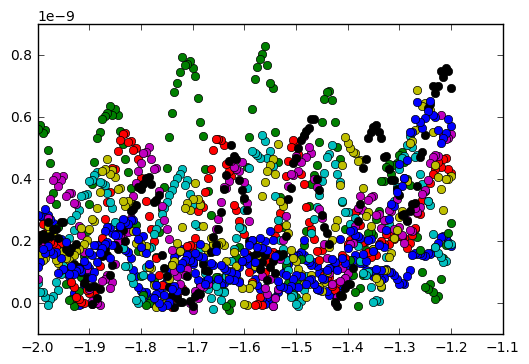

In [6]:
for i in xrange(1,9):
    exp2[i]=exp1[i,300:461]
    dat=baseline_als(exp1[i],1000,0.001,100)
    exp1[i]=exp1[i]-dat
    plt.plot(exp2[0],exp2[i],'o')

In [7]:
a=np.linspace(0, 0, num=9)
b=np.linspace(0, 0, num=9)

In [9]:
#!/usr/bin/env python
#<examples/doc_basic.py>
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
# create data to be fitted
for i in range(1,9):
    x=np.linspace(-0.8, -1.76, num=161)
    data=exp2[i]*1E9
    res=np.linspace(4.2, 3.6, num=161)
    
    def fcn2min(params, x, data):
        A = params['A']
        B = params['B']
        f = params['f']
        p = params['p']
        C = params['C']
        res=A+B*np.sin(f*x+p)
        return res - data
    
# create a set of Parameters
    params = Parameters()
    params.add('A',   value= 0)
    params.add('B', value= 10)
    params.add('f',   value= 40)
    params.add('C',   value= 0)
    params.add('p', value= a[i-1])       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
    
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.ylim(9,10)
    params2=result.params
    v = params2.valuesdict()
    a[i]=v['p']
    b[i]=v['B']
#plt.savefig('D:\\sl2.pdf', format='pdf')

ImportError: No module named lmfit

In [10]:
a.shape

(9,)

(-1.8, -0.8)

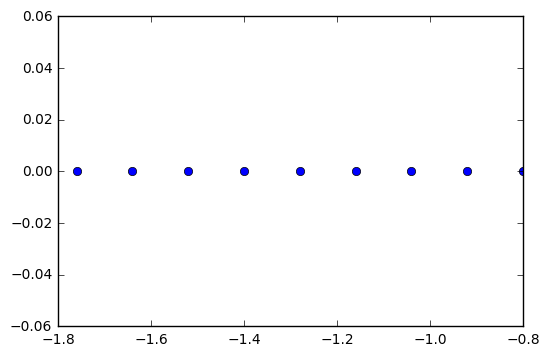

In [11]:
#for i in range(0,201):
#    plt.plot(expp1[i])
x=np.linspace(-1.76, -0.8, num=9)
plt.plot(x,-a/180, 'o')
#plt.plot(exp4[0],exp4[1]*4E9,'r')
plt.xlim(-1.8,-0.8)
#plt.ylim(0,500)

(-1.8, -0.8)

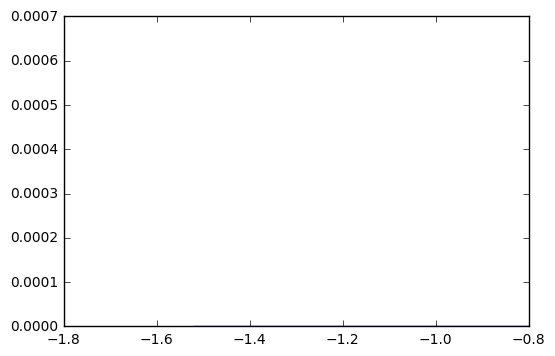

In [12]:
plt.plot(x[2:9],b[2:9])
plt.plot(exp4[0],exp4[2]*1E4,'r')
plt.xlim(-1.8,-0.8)

In [13]:
plt.plot(freq,exp2[2])
#plt.xlim(0,-100)
np.savetxt('D:\\fft_r2', exp2[2], delimiter=' ')
exp2[3].shape

NameError: name 'freq' is not defined

In [ ]:
exp2[1] = abs(scipy.fft(exp2[1]))

n = exp2[3].size
timestep = exp2[0,2]-exp2[0,1]
freq = np.fft.fftfreq(n, d=timestep)


In [ ]:
#for i in xrange(100):
#    plt.plot(abs(expp1[i]))
#    plt.ylim(0,0.5E-8)
plt.imshow(exp2[1:9],aspect='auto',interpolation='none')
#plt.ylim(0,-1.8)
plt.xlim(0,50)

In [ ]:
exp2=np.transpose(exp2)
plt.plot(exp2[6,1:9])

In [ ]:
exp3.shape
exp3 = np.fromfile('D://Figures+data//m.dat',dtype=float,count=-1, sep=" ")

In [ ]:
exp3 = np.reshape(exp3, (161, 201))
exp3=np.transpose(exp3)
for i in xrange(201):
    dat=baseline_als(exp3[i],10000,0.0001,100)
    exp3[i]=exp3[i]-dat

In [ ]:
cf=plt.imshow(np.transpose(exp3)*1E9, interpolation='none', aspect='auto',
           extent=[-32,28,-1.8,-0.9],vmax=1.6,cmap='bwr')

plt.ylabel("$V_1$ (V)",fontsize=25)
plt.xlabel("$B$ (mT)",fontsize=25)


cb = plt.colorbar(cf,ticks=[ 0, 1.6])

cb.set_label('$I$ (nA)',size = 20,labelpad = -1)
cb.set_ticklabels([0, 1.6])
for l in cb.ax.yaxis.get_ticklabels():
    l.set_size(20)

xt=np.linspace(-40, 40, num=2)
plt.xticks([-28,0,28], fontsize = 20)
plt.xlim(-28,28)
plt.ylim(-1.8,-1)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True)
yt=np.linspace(-1.8, -0.9, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.4))
plt.yticks([-1.8,-1.4,-1], fontsize = 20)
plt.axvline(x=-16, color='k', linestyle='dashed',lw=1)
plt.axvline(x=16, color='k', linestyle='dashed',lw=1)
plt.axvline(x=0, color='k', linestyle='-',lw=1)
plt.axhline(y=-1.72, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.62, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.52, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.42, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.32, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.22, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.16, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.09, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.02, color='k', linestyle='dotted',lw=0.8)
plt.savefig('D:\\sl1.pdf',bbox_inches='tight', format='pdf')

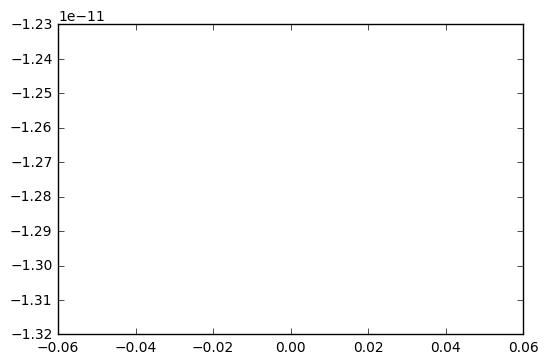

In [14]:
for i in xrange(100,120):
    plt.plot(np.transpose(exp3)[i])

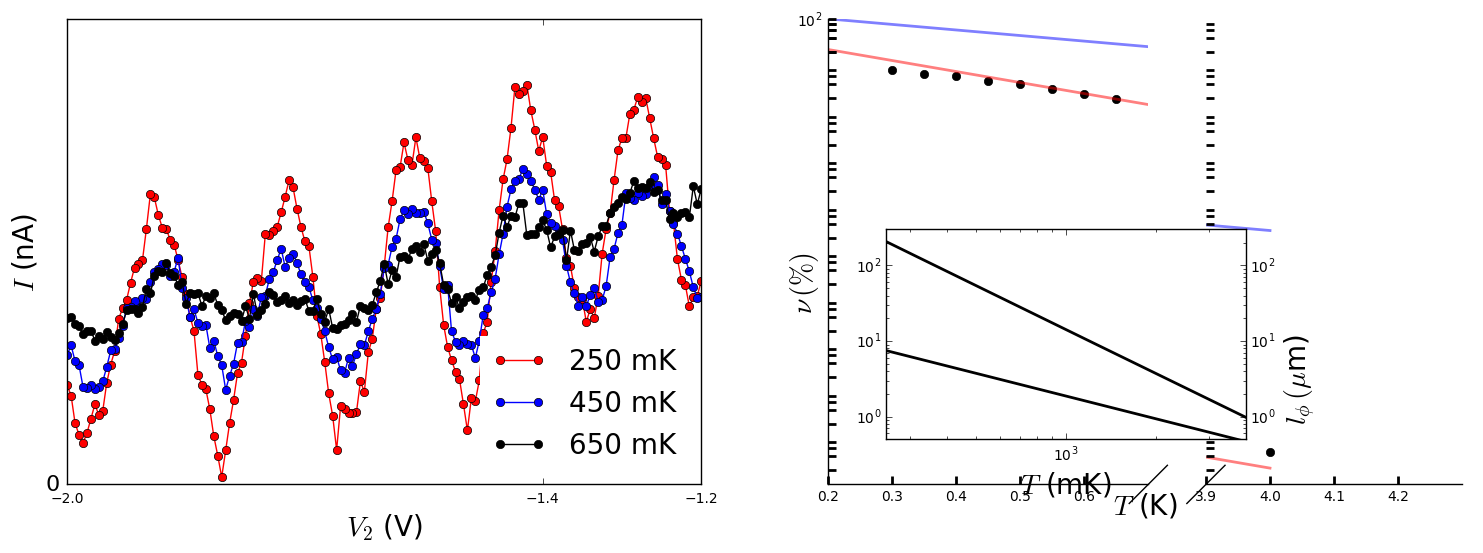

In [15]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import gridspec
fig = plt.figure(figsize=(18,6)) 
sps1, sps2 = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax = plt.subplot(sps1)


exp1 = np.fromfile("/Volumes/platonov/Figures+data/phase.dat",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (241,10))
exp2 = exp1.transpose()
#for i in range(0,3):
    #plt.plot(exp2[0],exp2[3*i+2],'ro-',markersize=4)
    #plt.plot(exp2[0],exp2[3*i+3],'bo-',markersize=4)
    #plt.plot(exp2[0],exp2[3*i],'ko-',markersize=4)
plt.plot(exp2[0],(exp2[1]*1E9-1)/2,'ro-' ,markersize=6)
plt.plot(exp2[0],(exp2[5]*1E9-1)/2,'bo-', markersize=6)
plt.plot(exp2[0],(exp2[9]*1E9-1)/2,'ko-', markersize=6)
yt=np.linspace(0, 3, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),1),fontsize=16)
#plt.ylim(-30,30)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True)
xt=np.linspace(-1.8, -1.2, num=4)
plt.xticks(np.arange(xt.min(), xt.max(),0.4),fontsize=10)
plt.xticks([-2,-1.4,-1.2], fontsize = 10)
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=6, label='250 mK',)
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=6,label='450 mK')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=6,label='650 mK')

#plt.text(-2, 2.51, '$n$=4', rotation=0,fontsize=25)

#plt.text(-1.5, 2.32, '$\\nu=\\frac{I_{max}-I_{min}}{I_{max}+I_{min}}=\\frac{A}{\\bar{I}}$', rotation=0,fontsize=27)



leg=plt.legend(handles=[red_patch,blue_patch,black_patch],loc=4,fontsize=20)
leg.get_frame().set_linewidth(0.0)
plt.ylim(0,0.6)
plt.xlim(-2,-1.2)
plt.xlabel("$V_2$ (V)",color='k',fontsize=20)
plt.ylabel("$I$ (nA)",fontsize=20)
plt.savefig('/Volumes/platonov/sl0.pdf',bbox_inches='tight', format='pdf')

y1=np.linspace(-2, -1, num=241)
y2=np.linspace(-2, -1, num=241)
y3=np.linspace(-2, -1, num=241)
xy=np.linspace(-2, -1, num=241)


y1 = abs(scipy.fft(exp2[1,0:241]))
y2 = abs(scipy.fft(exp2[5,0:241]))
y3 = abs(scipy.fft(exp2[9,0:241]))
ax.tick_params(direction='out', pad=5)
n = xy.size
timestep = xy[2]-xy[1]
xx = np.fft.fftfreq(n, d=timestep)


#Second plot
##############################################################################
from brokenaxes import brokenaxes
bax = brokenaxes(xlims=((0.2, 0.7), (3.9, 4.3)), subplot_spec=sps2,hspace=0)
exp7 = np.fromfile("/Volumes/platonov/lf.dat",dtype=float,count=-1, sep=" ")
exp7 = np.reshape(exp7, (-1,4))
exp7 = exp7.transpose()

exp4 = np.fromfile("/Volumes/platonov/Figures+data/vis.txt",dtype=float,count=-1, sep=" ")
exp4 = np.reshape(exp4, (11,2))
exp4 = exp4.transpose()
bax.semilogy(exp4[0,2:10]/1000,exp4[1,2:10]*100, 'ok',lw=1,markersize=6)
#plt.plot(exp4[0,11],exp4[1,11]*100-5, 'ok',lw=1,markersize=6)

bax.plot(4,5E-8, 'ok',lw=1,markersize=6)
#plt.plot(exp7[0],np.exp(-10/exp7[1])*90, 'ro',lw=1,markersize=6)
#plt.plot(exp7[0],np.exp(-0.01/exp7[3])*60, 'bo',lw=1,markersize=6)

coefficients1 = numpy.polyfit(exp7[0], -10/exp7[1], 1)
coefficients2 = numpy.polyfit(exp7[0],-0.01/exp7[3], 1)
polynomial1 = numpy.poly1d(coefficients1)
polynomial2 = numpy.poly1d(coefficients2)
x2=np.linspace(100,4000,100)
ys1 = polynomial1(x2)
ys2 = polynomial2(x2)
bax.plot(x2/1000,np.exp(ys1)*90,'r',lw=2,alpha=0.5)
bax.plot(x2/1000,np.exp(ys2)*60,'b',lw=2,alpha=0.5)
bax.set_ylim([1E-8, 100])
bax.tick_params(which='both',direction='in', length=6, width=2, colors='k')
bax.tick
#plt.plot(xx,y1*0.0079*1E12,'r',lw=2)
#plt.plot(xx,y2*0.0079*1E12, 'b',lw=2)
#plt.plot(xx,y3*0.0079*1E12,'k',lw=2)
coefficients = numpy.polyfit(exp4[0,2:10], np.log(exp4[1,2:10]), 1)
polynomial = numpy.poly1d(coefficients)
x=np.linspace(100,4000)
ys = polynomial(x)
#plt.semilogy(x, np.exp(ys)*100,'k',lw=2,alpha=0.5)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=False, left=False, right=True,labelright=True)
plt.xlim(0.1,4.2)
plt.ylim(1E-8,100)
#plt.title('Probability')
plt.xticks(fontsize=16)
#inset_axes.tick_params(direction='in')
#inset_axes.yaxis.get_major_locator().base(10)
#inset_axes.yaxis.get_minor_locator().base(10)
plt.yticks(fontsize = 16)
plt.axvline(x=7.9, color='k', linestyle='-',lw=1)

plt.xlabel("$T$ (K)",color='k',fontsize = 20)

plt.ylabel("$\\nu \,(\%)$" ,horizontalalignment='right',fontsize = 20)

#plt.xticks([250,4000], fontsize = 16)
plt.show
#inset_axes.yaxis.set_label_coords(0, 0.5)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

exp6 = np.fromfile("/Volumes/platonov/curves.dat",dtype=float,count=-1, sep=" ")
exp6 = np.reshape(exp6, (-1,5))
exp6 = exp6.transpose()

ax.tick_params(direction='in')
#plt.title("Temperature dependence (5)",color='k',fontsize = 25)
# this is an inset axes over the main axes
#inset_axes = inset_axes(ax, 
               #     width="38%", # width = 30% of parent_bbox
               #     height=1.1, # height : 1 inch
               #     loc=4)
            
inset_axes = plt.axes([.58, .2, .2, .35])    
inset_axes.yaxis.set_label_position("right")
inset_axes.tick_params(direction='in', pad=3)
plt.loglog(exp6[0],exp6[1], '-k',lw=2,markersize=6)
plt.loglog(exp6[0],exp6[2], '-k',lw=2,markersize=6)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelright=True,right=True)
#plt.loglog(exp4[0],exp4[1]*exp4[2]/(exp4[1]+exp4[2]), '-r',lw=2,markersize=6)
#plt.plot(xx,y1*0.0079*1E12,'r',lw=2)
#plt.plot(xx,y2*0.0079*1E12, 'b',lw=2)
#plt.plot(xx,y3*0.0079*1E12,'k',lw=2)
#coefficients = numpy.polyfit(exp4[0,2:10], np.log(exp4[1,2:10]), 1)
#polynomial = numpy.poly1d(coefficients)
#x=np.linspace(250,4000)
#ys = polynomial(x)
#plt.loglog(x, np.exp(ys)*100,'k',lw=2,alpha=0.5)
#plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=False, left=False, right=True,labelright=True)
plt.xlim(250,4000)
plt.ylim(0.5,300)
#plt.title('Probability')
#plt.xticks([])
inset_axes.tick_params(direction='in')
inset_axes.yaxis.get_major_locator().base(10)
inset_axes.yaxis.get_minor_locator().base(10)
#plt.yticks([1,10], fontsize = 16)
#plt.axvline(x=7.9, color='k', linestyle='-',lw=1)

plt.xlabel("$T$ (mK)",color='k',fontsize = 20)

plt.ylabel("$l_\\phi \,(\\mu$m)" ,horizontalalignment='right',fontsize = 20)

#plt.xticks([250,700], fontsize = 16)
plt.show
#inset_axes.yaxis.set_label_coords(0, 0.5)
inset_axes.tick_params(direction='in')
#plt.savefig('D:\\T.pdf',bbox_inches='tight', format='pdf')

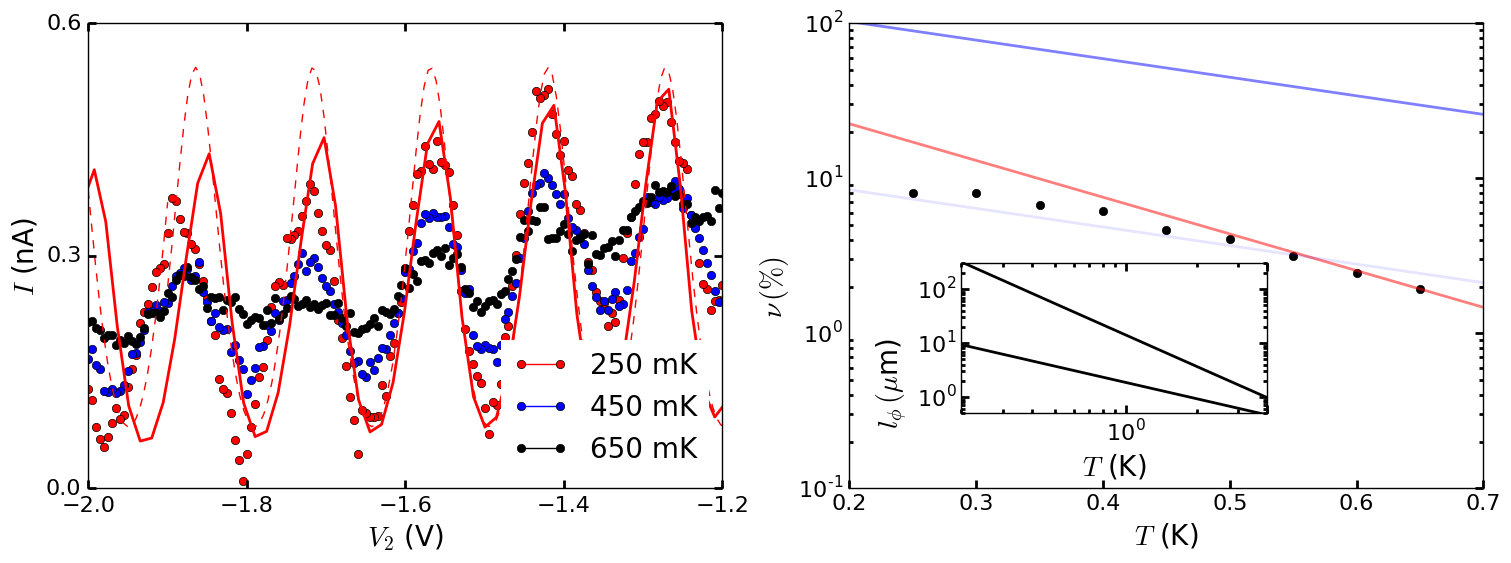

In [54]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import gridspec
fig = plt.figure(figsize=(18,6)) 
sps1, sps2 = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax = plt.subplot(sps1)

exp6 = np.fromfile("/Volumes/platonov/Figures+data/phase.dat",dtype=float,count=-1, sep=" ")
exp6.shape
exp6 = np.reshape(exp6, (241,10))
exp6 = exp1.transpose()

exp7 = np.fromfile("/Volumes/platonov/Figures+data/PCL250mKfit",dtype=float,count=-1, sep=" ")
exp7.shape
exp7 = np.reshape(exp7, (179,1))
exp7 = exp7.transpose()

exp8 = np.fromfile("/Volumes/platonov/Figures+data/total",dtype=float,count=-1, sep=" ")
exp9 = np.fromfile("/Volumes/platonov/Figures+data/xnew",dtype=float,count=-1, sep=" ")
exp8 = np.reshape(exp8, (150,-1))
exp9 = np.reshape(exp9, (150,-1))


exp1 = np.fromfile("/Volumes/platonov/Figures+data/phase.dat",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (241,10))
exp2 = exp1.transpose()
#for i in range(0,3):
    #plt.plot(exp2[0],exp2[3*i+2],'ro-',markersize=4)
    #plt.plot(exp2[0],exp2[3*i+3],'bo-',markersize=4)
    #plt.plot(exp2[0],exp2[3*i],'ko-',markersize=4)
plt.plot(exp2[0],(exp2[1]*1E9-1)/2,'ro' ,markersize=6)
plt.plot(exp2[0],(exp2[5]*1E9-1)/2,'bo', markersize=6)
plt.plot(exp2[0],(exp2[9]*1E9-1)/2,'ko', markersize=6)

#fits with models
plt.plot(exp9,exp8*1E9/2-0.5,'r-',lw=2)
xy=np.linspace(-2, -1.1, num=179)
plt.plot(xy+0.1,exp7[0]*1E9/2-0.5,'r--')
plt.plot(xy+0.99,exp7[0]*1E9/2-0.5,'r--')
plt.plot(xy-0.8,exp7[0]*1E9/2-0.5,'r--')
###############################################

yt=np.linspace(0, 3, num=4)
plt.yticks([0,0.3,0.6],fontsize=16)
#plt.ylim(-30,30)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True)
xt=np.linspace(-1.8, -1.2, num=4)
plt.xticks(np.arange(xt.min(), xt.max(),0.4),fontsize=10)
plt.xticks([-2,-1.8,-1.6,-1.4,-1.2], fontsize = 16)
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=6, label='250 mK',)
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=6,label='450 mK')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=6,label='650 mK')

#plt.text(-2, 2.51, '$n$=4', rotation=0,fontsize=25)

#plt.text(-1.5, 2.32, '$\\nu=\\frac{I_{max}-I_{min}}{I_{max}+I_{min}}=\\frac{A}{\\bar{I}}$', rotation=0,fontsize=27)

ax.tick_params(which='major',direction='in', length=6, width=2, colors='k')
ax.tick_params(which='minor',direction='in', length=3, width=2, colors='k')

leg=plt.legend(handles=[red_patch,blue_patch,black_patch],loc=4,fontsize=20)
leg.get_frame().set_linewidth(0.0)
plt.ylim(0,0.6)
plt.xlim(-2,-1.2)
plt.xlabel("$V_2$ (V)",color='k',fontsize=20)
plt.ylabel("$I$ (nA)",fontsize=20)
plt.savefig('/Volumes/platonov/sl0.pdf',bbox_inches='tight', format='pdf')

y1=np.linspace(-2, -1, num=241)
y2=np.linspace(-2, -1, num=241)
y3=np.linspace(-2, -1, num=241)
xy=np.linspace(-2, -1, num=241)


y1 = abs(scipy.fft(exp2[1,0:241]))
y2 = abs(scipy.fft(exp2[5,0:241]))
y3 = abs(scipy.fft(exp2[9,0:241]))
ax.tick_params(direction='out', pad=5)
n = xy.size
timestep = xy[2]-xy[1]
xx = np.fft.fftfreq(n, d=timestep)


#Second plot
##############################################################################
from brokenaxes import brokenaxes
bax = plt.subplot(sps2)
#bax = brokenaxes(xlims=((.2, .67),(3.98, 4.02)), subplot_spec=sps2,hspace=0.1)
exp7 = np.fromfile("/Volumes/platonov/lf.dat",dtype=float,count=-1, sep=" ")
exp7 = np.reshape(exp7, (-1,4))
exp7 = exp7.transpose()

exp4 = np.fromfile("/Volumes/platonov/Figures+data/vis.txt",dtype=float,count=-1, sep=" ")
exp4 = np.reshape(exp4, (11,2))
exp4 = exp4.transpose()
bax.semilogy(exp4[0,1:10]/1000,exp4[1,1:10]*100, 'ok',lw=1,markersize=6)
#plt.plot(exp4[0,11],exp4[1,11]*100-5, 'ok',lw=1,markersize=6)

#bax.plot(4,5E-8, 'ok',lw=1,markersize=6)
#plt.plot(exp7[0],np.exp(-10/exp7[1])*90, 'ro',lw=1,markersize=6)
#plt.plot(exp7[0],np.exp(-0.01/exp7[3])*60, 'bo',lw=1,markersize=6)

coefficients1 = numpy.polyfit(exp7[0], -10/exp7[1], 1)
coefficients2 = numpy.polyfit(exp7[0],-0.01/exp7[3], 1)
polynomial1 = numpy.poly1d(coefficients1)
polynomial2 = numpy.poly1d(coefficients2)
x2=np.linspace(100,4000,100)
ys1 = polynomial1(x2)
ys2 = polynomial2(x2)
bax.plot(x2/1000,np.exp(ys1)*90,'r',lw=2,alpha=0.5)
bax.plot(x2/1000,np.exp(ys2)*60,'b',lw=2,alpha=0.5)
bax.plot(x2/1000,np.exp(ys2-2.5)*60,'b',lw=2,alpha=0.1)
bax.set_ylim([0.1, 100])

bax.tick_params(which='major',direction='in', length=6, width=2, colors='k')
bax.tick_params(which='minor',direction='in', length=3, width=2, colors='k')

#plt.plot(xx,y1*0.0079*1E12,'r',lw=2)
#plt.plot(xx,y2*0.0079*1E12, 'b',lw=2)
#plt.plot(xx,y3*0.0079*1E12,'k',lw=2)
coefficients = numpy.polyfit(exp4[0,2:10], np.log(exp4[1,2:10]), 1)
polynomial = numpy.poly1d(coefficients)
x=np.linspace(100,4000)
ys = polynomial(x)
#plt.semilogy(x, np.exp(ys)*100,'k',lw=2,alpha=0.5)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=False, left=False, right=True,labelright=False)
plt.xlim(0.2,0.7)
plt.ylim(0.1,100)
#plt.title('Probability')
plt.xticks(fontsize=16)
#inset_axes.tick_params(direction='in')
#inset_axes.yaxis.get_major_locator().base(10)
#inset_axes.yaxis.get_minor_locator().base(10)
plt.yticks(fontsize = 16)
plt.axvline(x=7.9, color='k', linestyle='-',lw=1)

plt.xlabel("$T$ (K)",color='k',fontsize = 20)

plt.ylabel("$\\nu \,(\%)$" ,horizontalalignment='right',fontsize = 20)

#plt.xticks([250,4000], fontsize = 16)
plt.show
#inset_axes.yaxis.set_label_coords(0, 0.5)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

exp6 = np.fromfile("/Volumes/platonov/curves.dat",dtype=float,count=-1, sep=" ")
exp6 = np.reshape(exp6, (-1,5))
exp6 = exp6.transpose()

ax.tick_params(direction='in')
#plt.title("Temperature dependence (5)",color='k',fontsize = 25)
# this is an inset axes over the main axes
#inset_axes = inset_axes(ax, 
               #     width="38%", # width = 30% of parent_bbox
               #     height=1.1, # height : 1 inch
               #     loc=4)
            
inset_axes = plt.axes([.61, .25, 0.17, .25])    
inset_axes.yaxis.set_label_position("left")
inset_axes.tick_params(direction='in', pad=3)
plt.loglog(exp6[0]/1000,exp6[1], '-k',lw=2,markersize=6)
plt.loglog(exp6[0]/1000,exp6[2], '-k',lw=2,markersize=6)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False,right=True)
#plt.loglog(exp4[0],exp4[1]*exp4[2]/(exp4[1]+exp4[2]), '-r',lw=2,markersize=6)
#plt.plot(xx,y1*0.0079*1E12,'r',lw=2)
#plt.plot(xx,y2*0.0079*1E12, 'b',lw=2)
#plt.plot(xx,y3*0.0079*1E12,'k',lw=2)
#coefficients = numpy.polyfit(exp4[0,2:10], np.log(exp4[1,2:10]), 1)
#polynomial = numpy.poly1d(coefficients)
#x=np.linspace(250,4000)
#ys = polynomial(x)
#plt.loglog(x, np.exp(ys)*100,'k',lw=2,alpha=0.5)
#plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=False, left=False, right=True,labelright=True)
plt.xlim(0.2,4)
plt.ylim(0.5,300)
#plt.title('Probability')
plt.xticks([1,4])
inset_axes.tick_params(direction='in')
inset_axes.yaxis.get_major_locator().base(10)
inset_axes.yaxis.get_minor_locator().base(10)
#plt.yticks([1,10], fontsize = 16)
#plt.axvline(x=7.9, color='k', linestyle='-',lw=1)
inset_axes.tick_params(which='major',direction='in', length=6, width=2, colors='k')
inset_axes.tick_params(which='minor',direction='in', length=3, width=2, colors='k')
plt.xlabel("$T$ (K)",color='k',fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("$l_\\phi \,(\\mu$m)" ,horizontalalignment='right',fontsize = 20)

#plt.xticks([250,700], fontsize = 16)
plt.show
#inset_axes.yaxis.set_label_coords(0, 0.5)
inset_axes.tick_params(direction='in')
plt.savefig('/Volumes/platonov/T.svg',bbox_inches='tight', format='svg')

(1.5, 2.5)

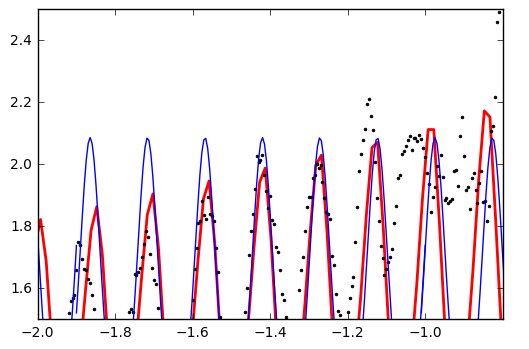

In [44]:
plt.plot(exp9,exp8*1E9,'r-',lw=2)
plt.plot(exp6[0],exp6[1]*1E9,'ko',markersize=2)

xy=np.linspace(-2, -1.1, num=179)
plt.plot(xy+0.1,exp7[0]*1E9,'b-')

plt.plot(xy+0.99,exp7[0]*1E9,'b-')
plt.plot(xy-0.8,exp7[0]*1E9,'b-')
plt.xlim(-2,-0.8)
plt.ylim(1.5,2.5)

In [38]:
exp7.shape

(241, 10)

<function matplotlib.pyplot.show>

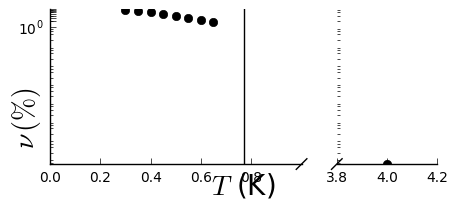

In [18]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np

fig = plt.figure(figsize=(5,2))
bax = brokenaxes(xlims=((0, 1), (3.8, 4.2)), hspace=.05)

exp7 = np.fromfile("/Volumes/platonov/lf.dat",dtype=float,count=-1, sep=" ")
exp7 = np.reshape(exp7, (-1,4))
exp7 = exp7.transpose()

exp4 = np.fromfile("/Volumes/platonov/Figures+data/vis.txt",dtype=float,count=-1, sep=" ")
exp4 = np.reshape(exp4, (11,2))
exp4 = exp4.transpose()
bax.semilogy(exp4[0,2:10]/1000,exp4[1,2:10]*100, 'ok',lw=1,markersize=6)
#plt.plot(exp4[0,11],exp4[1,11]*100-5, 'ok',lw=1,markersize=6)

bax.plot(4,5E-8, 'ok',lw=1,markersize=6)
#plt.plot(exp7[0],np.exp(-10/exp7[1])*90, 'ro',lw=1,markersize=6)
#plt.plot(exp7[0],np.exp(-0.01/exp7[3])*60, 'bo',lw=1,markersize=6)

plt.axvline(x=7.9, color='k', linestyle='-',lw=1)

plt.xlabel("$T$ (K)",color='k',fontsize = 20)

plt.ylabel("$\\nu \,(\%)$" ,horizontalalignment='right',fontsize = 20)

#plt.xticks([250,4000], fontsize = 16)
plt.show

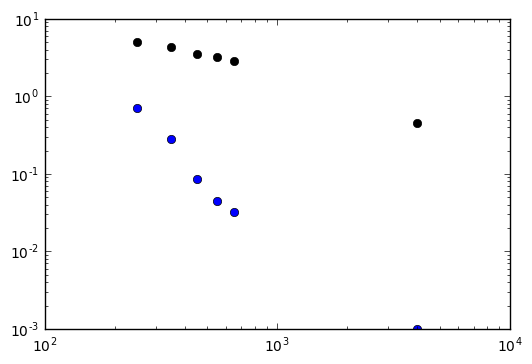

In [19]:
plt.loglog(exp7[0],exp7[3],'o')
plt.loglog(exp7[0],exp7[1],'ko')

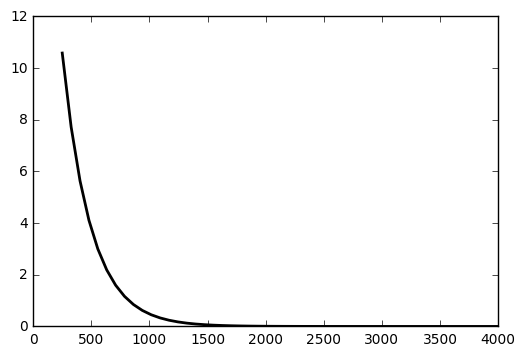

In [20]:
coefficients = numpy.polyfit(exp4[0,2:10], np.log(exp4[1,2:10]), 1)
polynomial = numpy.poly1d(coefficients)
x=np.linspace(250,4000)
ys = polynomial(x)
plt.plot(x, np.exp(ys)*100,'k',lw=2)

In [ ]:
exp4

In [ ]:
plt.plot(xy,y3)

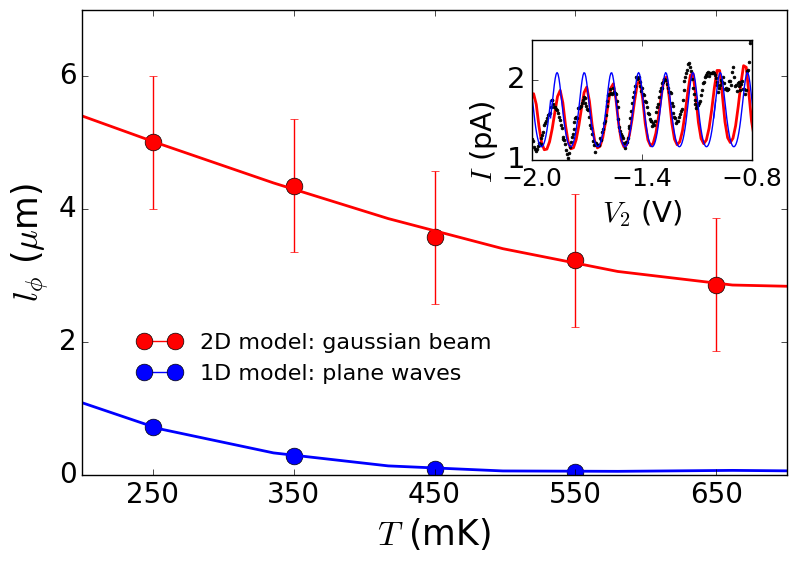

In [29]:
from matplotlib.legend_handler import HandlerPatch
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):


        center = 0.25 * width - 0.25 * xdescent, 0.25 * height - 0.25 * ydescent
        p = mpatches.Circle(xy=center, radius=height/1.5)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
exp1 = np.fromfile("/Volumes/platonov/Figures+data/parameters.dat",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (4,-1))
exp2 = exp1.transpose()
x=[250,350,450,550,650]
y=[1/0.2,1/0.23,1/0.28,1/0.31,1/0.35]
#for i in range(0,3):
    #plt.plot(exp2[0],exp2[3*i+2],'ro-',markersize=4)
    #plt.plot(exp2[0],exp2[3*i+3],'bo-',markersize=4)
    #plt.plot(exp2[0],exp2[3*i],'ko-',markersize=4)
plt.plot(exp2[0],exp2[3]/1000,'bo' ,markersize=12)
plt.plot(x,y,'ro' ,
         markersize=12)
plt.errorbar(x, y, 1, 1,'r',linestyle=' ')
#plt.plot(exp2[0],exp2[5]*1E9,'bo-', markersize=6)
#plt.plot(exp2[0],exp2[9]*1E9,'ro-', markersize=6)
yt=np.linspace(0, 40, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),2), fontsize= 20)
plt.ylim(0,7)
#plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True)
xt=np.linspace(250, 750, num=4)
plt.xticks(np.arange(xt.min(), xt.max(),100))
plt.xticks( fontsize = 20)

red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=12, label='2D model: gaussian beam')

blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=12,label='1D model: plane waves')


leg=ax.legend(handles=[red_patch,blue_patch],loc=6,fontsize=16,bbox_to_anchor=(0.05, 0.25))
#plt.legend()
leg.get_frame().set_linewidth(0.0)
#plt.ylim(1,2.5)
plt.xlim(200,700)
plt.xlabel("$T$ (mK)",fontsize=25)
plt.ylabel("$l_\phi$ ($\mu$m)",fontsize=25)


coefficients = numpy.polyfit(x, y, 3)
polynomial = numpy.poly1d(coefficients)
x=np.linspace(10,4000)
ys = polynomial(x)
plt.plot(x, ys,'r',lw=2)
coefficients = numpy.polyfit(exp2[0], exp2[3]/1000, 3)
polynomial = numpy.poly1d(coefficients)
x=np.linspace(10,4000)
ys = polynomial(x)
plt.plot(x, ys,'b',lw=2)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

# this is an inset axes over the main axes
#inset_axes = inset_axes(ax, 
 #                   width="50%", # width = 30% of parent_bbox
 #                   height=1.0, # height : 1 inch
 #                   loc=1)
inset_axes = plt.axes([.35, .65, .11, .2])    
inset_axes.yaxis.set_label_position("left")
inset_axes.tick_params(direction='in', pad=5)

plt.plot(exp4,exp3*1E9,'r-',lw=2)
plt.plot(exp6[0],exp6[1]*1E9,'ko',markersize=2)

xy=np.linspace(-2, -1.1, num=179)
plt.plot(xy+0.1,exp7[0]*1E9,'b-')

plt.plot(xy+0.99,exp7[0]*1E9,'b-')
plt.plot(xy-0.8,exp7[0]*1E9,'b-')

plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True,left=True, 
                right=False,labelright=False)
plt.xlim(-2,-0.8)
plt.ylim(1.5,2.5)
#plt.title('Probability')
#plt.xticks([])
plt.yticks([1,2], fontsize = 21)
plt.xlabel("$V_2$ (V)",color='k',fontsize = 21)
plt.ylabel("$I$ (pA)" ,horizontalalignment='right',fontsize = 21)
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=6,label='Experimental data')
re_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=6,label='2D Model')
bl_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=6,label='1D Model')
#leg=inset_axes.legend(handles=[black_patch,bl_patch,re_patch],loc=1,fontsize=16,bbox_to_anchor=(0.25, 0.85))
#plt.legend()
#leg.get_frame().set_linewidth(0.0)

plt.xticks([-0.8,-1.4,-2], fontsize = 18)
inset_axes.tick_params(direction='in', pad=5)

#plt.savefig('D:\\slt.pdf',bbox_inches='tight', format='pdf')

In [ ]:
exp2[3]

In [ ]:
exp4.shape

In [ ]:
x=np.linspace(10,4000)
ys = polynomial(x)
plt.plot(x, ys)